In [11]:
import numpy as np

In [12]:
X = 2*np.random.rand(100, 1)

In [14]:
y = 4 + 3*X + np.random.rand(100, 1)

In [16]:
X_b = np.c_[np.ones((100, 1)), X]

In [18]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [19]:
theta_best

array([[4.56622268],
       [2.91233787]])

In [20]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [23]:
y_predict = X_new_b.dot(theta_best)

In [24]:
y_predict

array([[ 4.56622268],
       [10.39089843]])

In [25]:
import matplotlib.pyplot as plt

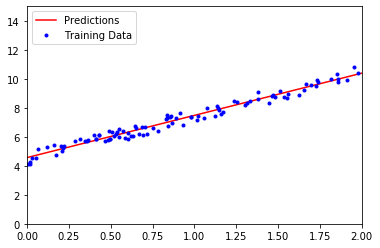

In [27]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.', label='Training Data')
plt.axis([0, 2, 0, 15])
plt.legend(loc='upper left')

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lin_reg = LinearRegression()

In [30]:
lin_reg.fit(X, y)

LinearRegression()

In [31]:
lin_reg.intercept_, lin_reg.coef_

(array([4.56622268]), array([[2.91233787]]))

In [32]:
lin_reg.predict(X_new)

array([[ 4.56622268],
       [10.39089843]])

In [33]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.56622268],
       [2.91233787]])

In [34]:
np.linalg.pinv(X_b).dot(y)

array([[4.56622268],
       [2.91233787]])

In [35]:
eta  = 0.1
n_iterations = 1000
m = 100

In [36]:
theta = np.random.rand(2, 1)

In [37]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [38]:
theta

array([[4.56622268],
       [2.91233787]])

In [43]:
n_epochs = 50
t0, t1 = 5, 50

In [40]:
def learning_schedule(t):
    return t0/(t + t1)

In [41]:
theta = np.random.randn(2, 1)

In [42]:
m = len(X_b)

In [46]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [47]:
theta

array([[4.56778418],
       [2.90580678]])

In [48]:
from sklearn.linear_model import SGDRegressor

In [49]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [50]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.52855611]), array([2.91210947]))

In [51]:
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

[-3, 3, 0, 10]

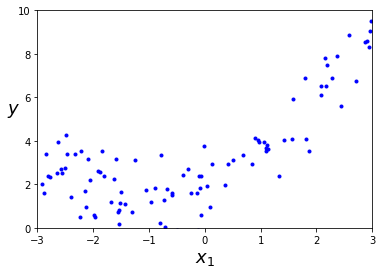

In [52]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [55]:
X_poly = poly_features.fit_transform(X)

In [56]:
X[0]

array([0.95446922])

In [57]:
X_poly[0]

array([0.95446922, 0.91101149])

In [58]:
lin_reg = LinearRegression()

In [59]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [60]:
lin_reg.intercept_, lin_reg.coef_

(array([1.87362847]), array([[1.00467884, 0.48710799]]))

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
from sklearn.model_selection import train_test_split

In [65]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.axis([0, 80, 0, 3])

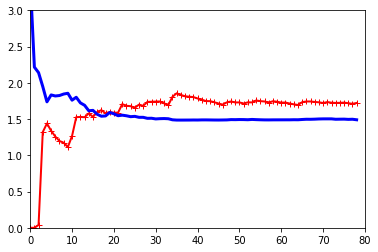

In [66]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [67]:
from sklearn.pipeline import Pipeline

In [68]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)), 
    ('lin_reg', LinearRegression())
])

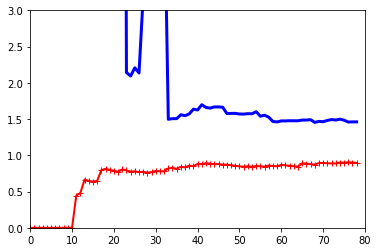

In [69]:
plot_learning_curves(polynomial_regression, X, y)

In [70]:
from sklearn.linear_model import Ridge

In [71]:
ridge_reg = Ridge(alpha=1, solver='cholesky')

In [72]:
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [73]:
ridge_reg.predict([[1.5]])

array([[4.80781071]])

In [75]:
sgd_reg = SGDRegressor(penalty='l2')

In [77]:
sgd_reg.fit(X, y.ravel())

SGDRegressor()

In [78]:
sgd_reg.predict([[1.5]])

array([4.76451678])

In [83]:
from sklearn.linear_model import Lasso

In [84]:
lasso_reg = Lasso(alpha=0.1)

In [85]:
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [86]:
lasso_reg.predict([[1.5]])

array([4.75351538])

In [87]:
sgd_reg = SGDRegressor(penalty='l1')

In [88]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(penalty='l1')

In [89]:
sgd_reg.predict([[1.5]])

array([4.80368696])

In [90]:
from sklearn.linear_model import ElasticNet

In [91]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [92]:
elastic_net.fit(X, y)

ElasticNet(alpha=0.1)

In [94]:
elastic_net.predict([[1.5]])

array([4.75557782])

In [103]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5)

In [104]:
from sklearn.base import clone

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

In [107]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [108]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005)

In [112]:
minimum_val_error = float('inf')
best_epoch, best_model = None, None

In [113]:
from copy import deepcopy

In [114]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch, best_model = epoch, deepcopy(sgd_reg)

In [115]:
best_epoch, best_model

(1,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              tol=-inf, warm_start=True))

In [116]:
from sklearn import datasets

In [117]:
iris = datasets.load_iris()

In [118]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [122]:
X = iris['data'][:, 3:]

In [123]:
y = (iris['target'] == 2).astype(np.int)

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [130]:
X_new = np.linspace(0, 3, 1000).reshape(1000, 1)

In [133]:
y_proba = log_reg.predict_proba(X_new)

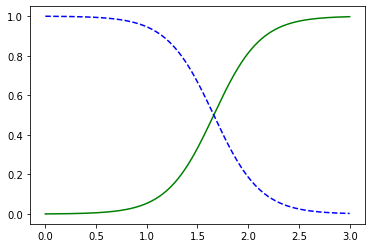

In [134]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris Virginca')

In [135]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [138]:
log_reg.predict_proba([[1.7], [1.5]])

array([[0.45722097, 0.54277903],
       [0.66709636, 0.33290364]])

In [143]:
X = iris['data'][:, (2, 3)]
y = iris['target']

In [144]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)

In [145]:
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [146]:
softmax_reg.predict([[5, 2]])

array([2])

In [148]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [ ]:
# batch gradient descenet with early stopping for Softmax Regression, w/o sklearn
